In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from tqdm import tqdm

In [2]:
inchies_unique_keys = pd.read_csv('../data/raw/inchie_logic_data/unique_inchi_keys.csv')
inchies_unique_keys

,inchi_key
0,KLZJMDMPVXMRJW-UHFFFAOYSA-N
1,YNDPZZOSRIXEHA-UHFFFAOYSA-N
2,JZCFOFBBUQBNLT-UHFFFAOYSA-N
3,LVKDKVPBCUNQTN-UHFFFAOYSA-N
4,NCYNCENPEAPEHN-UHFFFAOYSA-N
...,...
40576,DCJPOKROUMJZAR-UHFFFAOYSA-N
40577,MDJPQJBJEXXHBV-UHFFFAOYSA-N
40578,CNRRZYYKTUYCNK-UHFFFAOYSA-N
40579,NWMIHNIBJACJRY-UHFFFAOYSA-N


In [3]:
def replace(smile):
    return smile.replace("-","")

In [3]:
max_retro_bond_ratio= pd.read_parquet('../data/raw/inchie_logic_data/max_retro_bond_ratio.parquet')
max_retro_bond_ratio

,smiles,inchkey_encoding,nb_pure_block,nb_retro_bond,nb_smiles_bond,retro_bond_ratio,pure,zinc_id,mem_score,nb_total_blocks
0,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,4,3,5,1.000000,True,0,1.000000,4
1,F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,4,6,1.000000,True,1,0.890909,5
2,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C=C(-C=C...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,4,6,1.000000,True,2,0.849057,5
3,O1-C-C-C-O-C2-C-1=C-C=C(-C=2)-S(=O)(=O)-N-C1-C...,CBXMULHQEVXJDI-UHFFFAOYSA-N_RAHZWNYVWXNFOC-UHF...,4,5,4,0.600000,True,3,1.031250,4
4,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C(=C-C=C...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,5,6,0.800000,True,4,0.894737,5
...,...,...,...,...,...,...,...,...,...,...
1936921,F-C(-F)(-F)-C1-C=C-C=C(-C=1)-C(-C1-C=N-C=C-C=1...,XPDWGBQVDMORPB-UHFFFAOYSA-N_UHOVQNZJYSORNB-UHF...,4,5,6,0.800000,False,1936951,0.950820,5
1936922,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N1-C-C-C...,ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...,5,18,4,0.222222,True,1936952,0.920000,5
1936923,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N-C1=C-C...,ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...,6,14,5,0.357143,True,1936953,0.888889,6
1936924,O=C(-C(-C)(-C)-C)-N1-C-C-C-N(-C-C-1)-C1=N-C=N-...,FJJYHTVHBVXEEQ-UHFFFAOYSA-N_FQUYSHZXSKYCSY-UHF...,2,9,4,0.222222,False,1936954,1.121212,3


In [4]:
max_retro_bond_ratio['inchkey_encoding']

0          QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...
1          QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...
2          QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...
3          CBXMULHQEVXJDI-UHFFFAOYSA-N_RAHZWNYVWXNFOC-UHF...
4          QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...
                                 ...                        
1936921    XPDWGBQVDMORPB-UHFFFAOYSA-N_UHOVQNZJYSORNB-UHF...
1936922    ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...
1936923    ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...
1936924    FJJYHTVHBVXEEQ-UHFFFAOYSA-N_FQUYSHZXSKYCSY-UHF...
1936925    IOJUPLGTWVMSFF-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...
Name: inchkey_encoding, Length: 1936926, dtype: object

In [37]:
part_0_bis.to_parquet('../data/processed/table_inchi_key_tag.parquet', index=False)

In [5]:
part_0["smiles"] = part_0["block"].apply(replace)

In [300]:
import re
import numpy as np

# Échapper les caractères spéciaux et trier par longueur décroissante
blocks = [re.escape(block) for block in part_0_bis["block"]]
blocks.sort(key=len, reverse=True)  # Plus longs en premier

pattern = re.compile('|'.join(blocks))

In [ ]:
lens = np.array([len(k) for k in part_0_bis["block"]])

In [301]:
import re
txt = ""
for k in part_0_bis["block"]:
    txt += k + "|"
txt = txt[:-1]  # Remove the last "|"
print(txt[:1000])  # Print the first 1000 characters for brevity
pattern = re.compile(txt)

N1-C-C(-C-C-1=O)|N1-C-C(-C-C-1=O)|N1-C-C(-C-C-1=O)|N1-C-C(-C-C-1=O)|N1-C-C(-C)-O-C-C-1|N1-C-C(-C)-O-C-C-1|N1-C-C(-C)-O-C-C-1|N1-C-C(-C)-O-C-C-1|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C12-C-N(-C(-C)=O)-C-C(-C-2-O)(-C-N(-C-1)-C(-C)=O)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1(-C)-C-C=C-C-C-1(-C)|C1-C-C(-O-C)-O-C(-C-1)(-C)|C1-C-C(-O-C)-O-C(-C-1)(-C)|C1-C-C(-O-C)-O-C(-C-1)(-C)|C1-C-C(-O-C)-O-C(-C-1)(-C)|C1-C-C(-C)(-C=C)-O-C(-C-1)|C1-C-C(-C)(-C=C)-O-C(-C-1)|C1-C-C(-C)(-C=C)-O-C(-C-1)|C1-C-C(-C)

**count if valid mol**

In [ ]:
mol = part_0["smiles"].apply(Chem.MolFromSmiles).to_list()
count = 0
for i in range(len(mol)):
    if mol[i] :
        count += 1
print(count/len(mol))

In [11]:
# Voir toutes les colonnes de chaque DataFrame
print("Colonnes de part_0:")
print(part_0.columns.tolist())

print("\nColonnes de inchies_unique_keys:")
print(inchies_unique_keys.columns.tolist())

Colonnes de part_0:
['block', 'begin_tag', 'end_tag', 'MolWt', 'nHDonors', 'nHAcceptors', 'nRotatableBonds', 'CrippenlogP', 'TPSA', 'status', 'inchi_key']

Colonnes de inchies_unique_keys:
['inchi_key']


On ne prend que ce qui sont utiles

In [54]:
part_0_bis[part_0_bis["inchi_key"] ==part_0_bis["inchi_key"][1]]

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key,new_inchi_key
1,F-C1=C-C=C(-F)-C=C-1,no_tag,L16,114.028107,0,0,0,1.9648,0.0,True,QUGUFLJIAFISSW-UHFFFAOYSA-N,QUGUFLJIAFISSW-UHFFFAOYSA-N1
1995,C1-C(-F)=C-C=C(-C=1)-F,L16,no_tag,114.028107,0,0,0,1.9648,0.0,True,QUGUFLJIAFISSW-UHFFFAOYSA-N,QUGUFLJIAFISSW-UHFFFAOYSA-N1971
4368,C1=C-C(-F)=C-C=C-1-F,L16,no_tag,114.028107,0,0,0,1.9648,0.0,True,QUGUFLJIAFISSW-UHFFFAOYSA-N,QUGUFLJIAFISSW-UHFFFAOYSA-N4106
8292,F-C1=C-C=C(-F)-C(=C-1),no_tag,L16,114.028107,0,0,0,1.9648,0.0,True,QUGUFLJIAFISSW-UHFFFAOYSA-N,QUGUFLJIAFISSW-UHFFFAOYSA-N7058
115712,C1-C=C(-F)-C(=C-C=1-F),L16,L16,114.028107,0,0,0,1.9648,0.0,True,QUGUFLJIAFISSW-UHFFFAOYSA-N,QUGUFLJIAFISSW-UHFFFAOYSA-N51890


In [55]:
max_retro_bond_ratio["smiles"][0]

'F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F)-C(=C-C=1)-F'

In [309]:
part_0_bis.columns.tolist()

['block',
 'begin_tag',
 'end_tag',
 'MolWt',
 'nHDonors',
 'nHAcceptors',
 'nRotatableBonds',
 'CrippenlogP',
 'TPSA',
 'status',
 'inchi_key',
 'is-special-key',
 'new_inchi_key']

In [5]:
part_0_bis = pd.read_parquet('../data/processed/inchi_data/table_inchi_key_tag.parquet')
part_0_bis = part_0_bis.drop(columns=["new_inchi_key"])
part_0_bis = part_0_bis.drop_duplicates()
part_0_bis

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key
0,F-C1-C(=C-C=C(-C=1-F)-S(=O)(=O)-N-C1=C-C(-F)=C...,no_tag,no_tag,323.003941,1,2,3,3.18290,46.17,False,JKSJZQMDBPCLLP-UHFFFAOYSA-N
1,F-C1=C-C=C(-F)-C=C-1,no_tag,L16,114.028107,0,0,0,1.96480,0.00,True,QUGUFLJIAFISSW-UHFFFAOYSA-N
2,N,L5,L5,17.026549,1,1,0,0.16200,35.00,True,QGZKDVFQNNGYKY-UHFFFAOYSA-N
3,S(=O)(=O),L12b_L12,L12b,63.961900,0,2,0,-0.67020,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N
4,C1-C(-F)=C(-F)-C(=C-C=1)-F,L16,no_tag,132.018685,0,0,0,2.10390,0.00,True,AJKNNUJQFALRIK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...
89305,N-C1=C-C(-Cl)=C-C(-Cl)=C-1,no_tag,L16,160.979905,1,1,0,2.57560,26.02,True,UQRLKWGPEVNVHT-UHFFFAOYSA-N
89306,C1-C(=C-C(=C-C=1)-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True,OAWHISBYSDFHHU-UHFFFAOYSA-N
89307,C1=C(-C)-N=C2-C(=C-1-C)-C(=O)-N-N-2-C,L16,no_tag,177.090212,1,3,0,0.87844,50.68,False,XQCLUVVQJMLNAW-UHFFFAOYSA-N
89308,C(-C-C(=O)-N-C1=C-C=C(-C)-C=N-1),L8,L4,164.094963,1,2,2,1.73852,41.99,True,KSYMTPGPTYYEHB-UHFFFAOYSA-N


In [6]:
part_0_bis[part_0_bis["inchi_key"]=="RAHZWNYVWXNFOC-UHFFFAOYSA-N"]

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key
3,S(=O)(=O),L12b_L12,L12b,63.9619,0,2,0,-0.6702,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N
1951,S(=O)(=O),L12b,L12b,63.9619,0,2,0,-0.6702,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N
8163,S(=O)(=O),L12b,L12b_L12,63.9619,0,2,0,-0.6702,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N


In [271]:
def bin(s):
    if "_" in s and s!='no_tag':
        return True
    return False

part_0_bis["is-special-key"] = part_0_bis["end_tag"].apply(bin)
part_0_bis[part_0_bis["is-special-key"] ][["begin_tag","end_tag","inchi_key"]]


,begin_tag,end_tag,inchi_key
6,no_tag,L12b_L12,DUIGXEUGFPLVQJ-UHFFFAOYSA-N
28,no_tag,L16b_L15,XDTMQSROBMDMFD-UHFFFAOYSA-N
33,no_tag,L16b_L15,RGSFGYAAUTVSQA-UHFFFAOYSA-N
44,no_tag,L16b_L15,PMPVIKIVABFJJI-UHFFFAOYSA-N
49,no_tag,L16b_L15,LVZWSLJZHVFIQJ-UHFFFAOYSA-N
...,...,...,...
89215,L14,L16b_L15,AZYFWXYXKPORAT-UHFFFAOYSA-N
89218,no_tag,L16b_L15_L17,HPTJCOFEESYONH-UHFFFAOYSA-N
89228,no_tag,L16b_L15,DOCLMTQMWGMALI-UHFFFAOYSA-N
89229,no_tag,L16b_L15,QHAQBSYGODNFPY-UHFFFAOYSA-N


In [272]:
part_0_bis["is-special-key"] = part_0_bis["begin_tag"].apply(bin)
part_0_bis[part_0_bis["is-special-key"] ][["begin_tag","end_tag","inchi_key"]]

,begin_tag,end_tag,inchi_key
3,L12b_L12,L12b,RAHZWNYVWXNFOC-UHFFFAOYSA-N
57,L10_L9,L16b_L15,HNJBEVLQSNELDL-UHFFFAOYSA-N
70,L13_L14b,no_tag,WYURNTSHIVDZCO-UHFFFAOYSA-N
84,L16b_L15,no_tag,MZJYQXPULRLGCA-UHFFFAOYSA-N
92,L16b_L15_L17,no_tag,UMRZSTCPUPJPOJ-UHFFFAOYSA-N
...,...,...,...
89200,L8_L4,L14,QSWNLSXRJZWSJX-UHFFFAOYSA-N
89202,L13_L14b,L14b,NHZLLKNRTDIFAD-UHFFFAOYSA-N
89217,L16b_L15,no_tag,HXUXMDQJDDDOIJ-UHFFFAOYSA-N
89285,L16b_L15,L14b,URVFUGLHTGKAAQ-UHFFFAOYSA-N


In [ ]:
rows_to_add = []
rows_to_drop = []

for k in tqdm.tqdm(part_0_bis.index):
    if "no_tag" != part_0_bis["begin_tag"][k]:
        splitted = part_0_bis["begin_tag"][k].split("_")
        if len(splitted) > 1:
            for m in splitted:
                new_row = [part_0_bis[l][k] if l != "begin_tag" else m for l in part_0_bis.columns]
                rows_to_add.append(new_row)
            rows_to_drop.append(k)

# Appliquer les modifications
part_0_bis = part_0_bis.drop(index=rows_to_drop)
if rows_to_add:
    new_df = pd.DataFrame(rows_to_add, columns=part_0_bis.columns)
    part_0_bis = pd.concat([new_df, part_0_bis], ignore_index=True)
part_0_bis = part_0_bis.drop_duplicates()
rows_to_add = []
rows_to_drop = []

for k in tqdm.tqdm(part_0_bis.index):
    if "no_tag" != part_0_bis["end_tag"][k]:
        splitted = part_0_bis["end_tag"][k].split("_")
        if len(splitted) > 1:
            for m in splitted:
                new_row = [part_0_bis[l][k] if l != "end_tag" else m for l in part_0_bis.columns]
                rows_to_add.append(new_row)
            rows_to_drop.append(k)

part_0_bis = part_0_bis.drop(index=rows_to_drop)
# Appliquer les modifications
if rows_to_add:
    new_df = pd.DataFrame(rows_to_add, columns=part_0_bis.columns)
    part_0_bis = pd.concat([new_df, part_0_bis], ignore_index=True)
part_0_bis = part_0_bis.drop_duplicates()


100%|██████████| 89310/89310 [00:01<00:00, 70041.00it/s]


In [280]:

part_0_bis["is-special-key"] = part_0_bis["begin_tag"].apply(bin)
part_0_bis[part_0_bis["is-special-key"] ][["begin_tag","end_tag","inchi_key"]]

,begin_tag,end_tag,inchi_key


In [281]:
part_0_bis["is-special-key"] = part_0_bis["end_tag"].apply(bin)
part_0_bis[part_0_bis["is-special-key"] ][["begin_tag","end_tag","inchi_key"]]

,begin_tag,end_tag,inchi_key


In [ ]:
part_0_bis.to_csv("../data/processed/inchi_data/table_inchi_tag_unique.csv", index=False)

In [89]:
import json

# Open and read the JSON file
with open('../data/processed/inchi_data/rbond_pattern_smarts.json', 'r') as file:
    data = json.load(file)

# Print the data
possible_tag_bond = data.keys()

In [117]:
[k for k in possible_tag_bond if bin(k) ]

['L30-L12',
 'L30-L12b',
 'L5-L12',
 'L51-L12',
 'L51-L12b',
 'L12b-L12b',
 'L12b-L5',
 'L12b-L4',
 'L12b-L13',
 'L12b-L14',
 'L12b-L14b',
 'L12b-L15',
 'L12b-L16',
 'L12b-L16b',
 'L17-L12b',
 'L17-L12']

In [310]:
part_0_bis = pd.read_csv("../data/processed/inchi_data/table_inchi_tag_unique.csv")

new_inchi_key = []
list_inchikey = part_0_bis["inchi_key"].to_list()
for k in range(len(part_0_bis["block"])):
    new_inchi_key.append(list_inchikey[k]+str(k))
part_0_bis["new_inchi_key"] = new_inchi_key
part_0_bis=part_0_bis.drop(columns='Unnamed: 0')

In [327]:
part_0_bis[part_0_bis["block"]=="N"]

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key,is-special-key,new_inchi_key
37627,N,L5,L5,17.026549,1,1,0,0.162,35.0,True,QGZKDVFQNNGYKY-UHFFFAOYSA-N,False,QGZKDVFQNNGYKY-UHFFFAOYSA-N37627


In [339]:
part_00 = pd.read_parquet('../data/processed/inchi_data/table_inchi_key_tag.parquet')

In [342]:

import re

escaped_vocab = list(set([re.escape(token) for token in part_00["block"]]))
    # Créer un pattern qui cherche tous les tokens du vocabulaire
escaped_vocab.sort(key=len,reverse=False)
pattern = r'|'.join(escaped_vocab)

def tokenize_with_regex(text, pattern=pattern):
    """
    Tokenise en utilisant des expressions régulières
    """
    # Échapper les caractères spéciaux dans le vocabulair
    
    # Trouver toutes les correspondances
    matches = re.findall(pattern, text, re.IGNORECASE)
    return matches
"""
    Tokenise en utilisant des expressions régulières
"""


gaz = tokenize_with_regex(max_retro_bond_ratio["smiles"][0],pattern)
print(gaz)
for k in gaz :
    print(part_0_bis[part_0_bis["block"]==k][["begin_tag","end_tag","inchi_key","block"]])

['F-C1=C-C=C(-F)-C=C-1', 'N', 'S', 'O', 'O', 'C', 'C', 'C', 'C', 'C', 'C']
      begin_tag end_tag                    inchi_key                 block
37626    no_tag     L16  QUGUFLJIAFISSW-UHFFFAOYSA-N  F-C1=C-C=C(-F)-C=C-1
      begin_tag end_tag                    inchi_key block
37627        L5      L5  QGZKDVFQNNGYKY-UHFFFAOYSA-N     N
      begin_tag end_tag                    inchi_key block
37714       L11     L11  RWSOTUBLDIXVET-UHFFFAOYSA-N     S
      begin_tag end_tag                    inchi_key block
37652        L3      L3  XLYOFNOQVPJJNP-UHFFFAOYSA-N     O
      begin_tag end_tag                    inchi_key block
37652        L3      L3  XLYOFNOQVPJJNP-UHFFFAOYSA-N     O
       begin_tag end_tag                    inchi_key block
19869         L8      L8  VNWKTOKETHGBQD-UHFFFAOYSA-N     C
19870         L8      L4  VNWKTOKETHGBQD-UHFFFAOYSA-N     C
21237         L4      L8  VNWKTOKETHGBQD-UHFFFAOYSA-N     C
21238         L4      L4  VNWKTOKETHGBQD-UHFFFAOYSA-N     C
302

In [328]:
re.findall(pattern, 'N-S(=O)(=O)', re.IGNORECASE)

['N-S(=O)(=O)']

In [ ]:
def check_compatibility():

In [ ]:
def inchkey_encoding_to_new_inchi_key(inchi_key_enc):
    dico_bond ={}
    new_inchi_keys = {}
    for k in inchi_key_enc.split("_"):
        if len(part_0_bis[part_0_bis["inchi_key"]==k]["begin_tag"])>1:
            dico_bond[k] = part_0_bis[part_0_bis["inchi_key"]==k][["begin_tag","end_tag","block","new_inchi_key"]]
        else:
            new_inchi_keys[k] = part_0_bis[part_0_bis["inchi_key"]==k]["new_inchi_key"]


In [334]:
for k in max_retro_bond_ratio["inchkey_encoding"][0].split("_"):
    print(part_0_bis[part_0_bis["inchi_key"]==k])
print(len(max_retro_bond_ratio["inchkey_encoding"][0].split("_")))

                        block begin_tag end_tag       MolWt  nHDonors  \
37626    F-C1=C-C=C(-F)-C=C-1    no_tag     L16  114.028107         0   
39318  C1-C(-F)=C-C=C(-C=1)-F       L16  no_tag  114.028107         0   
41070    C1=C-C(-F)=C-C=C-1-F       L16  no_tag  114.028107         0   
43580  F-C1=C-C=C(-F)-C(=C-1)    no_tag     L16  114.028107         0   
81566  C1-C=C(-F)-C(=C-C=1-F)       L16     L16  114.028107         0   

       nHAcceptors  nRotatableBonds  CrippenlogP  TPSA  status  \
37626            0                0       1.9648   0.0    True   
39318            0                0       1.9648   0.0    True   
41070            0                0       1.9648   0.0    True   
43580            0                0       1.9648   0.0    True   
81566            0                0       1.9648   0.0    True   

                         inchi_key  is-special-key  \
37626  QUGUFLJIAFISSW-UHFFFAOYSA-N           False   
39318  QUGUFLJIAFISSW-UHFFFAOYSA-N           False   
41

In [ ]:
for i in range(len(key_list)):
    if i == 0 and bond_dict[i]["end_tag"]!="":
        

In [291]:
def separate(inchkey):
    """Separate the InChIKey into its components."""
    parts = inchkey.split('_')
    return parts
encoded_smiles = max_retro_bond_ratio["inchkey_encoding"].apply(separate)


In [292]:
max([len(k) for k in encoded_smiles])


12

In [294]:
moses_training = pd.read_csv("../data/training_data/moses_canonical.csv")

In [295]:
max_retro_bond_ratio = max_retro_bond_ratio.merge(
    moses_training[["SMILES", "SPLIT"]], 
    left_on="true_true_smiles", 
    right_on="SMILES", 
    how="left"
).drop("SMILES", axis=1)


KeyError: 'true_true_smiles'

In [ ]:
max_retro_bond_ratio["SPLIT"] = moses_training[moses_training["SMILES"] == max_retro_bond_ratio["true_true_smiles"]]["SPLIT"]

True

In [90]:
max_retro_bond_ratio["true_smiles"][0] in max_retro_bond_ratio["true_smiles"].values

True

# Reassemblage


In [2]:
inchies_unique_keys = pd.read_csv('../data/raw/inchie_logic_data/unique_inchi_keys.csv')
inchies_unique_keys

,inchi_key
0,KLZJMDMPVXMRJW-UHFFFAOYSA-N
1,YNDPZZOSRIXEHA-UHFFFAOYSA-N
2,JZCFOFBBUQBNLT-UHFFFAOYSA-N
3,LVKDKVPBCUNQTN-UHFFFAOYSA-N
4,NCYNCENPEAPEHN-UHFFFAOYSA-N
...,...
40576,DCJPOKROUMJZAR-UHFFFAOYSA-N
40577,MDJPQJBJEXXHBV-UHFFFAOYSA-N
40578,CNRRZYYKTUYCNK-UHFFFAOYSA-N
40579,NWMIHNIBJACJRY-UHFFFAOYSA-N


In [3]:
max_retro_bond_ratio= pd.read_parquet('../data/raw/inchie_logic_data/max_retro_bond_ratio.parquet')
max_retro_bond_ratio

,smiles,inchkey_encoding,nb_pure_block,nb_retro_bond,nb_smiles_bond,retro_bond_ratio,pure,zinc_id,mem_score,nb_total_blocks
0,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,4,3,5,1.000000,True,0,1.000000,4
1,F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,4,6,1.000000,True,1,0.890909,5
2,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C=C(-C=C...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,4,6,1.000000,True,2,0.849057,5
3,O1-C-C-C-O-C2-C-1=C-C=C(-C=2)-S(=O)(=O)-N-C1-C...,CBXMULHQEVXJDI-UHFFFAOYSA-N_RAHZWNYVWXNFOC-UHF...,4,5,4,0.600000,True,3,1.031250,4
4,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C(=C-C=C...,QUGUFLJIAFISSW-UHFFFAOYSA-N_QGZKDVFQNNGYKY-UHF...,5,5,6,0.800000,True,4,0.894737,5
...,...,...,...,...,...,...,...,...,...,...
1936921,F-C(-F)(-F)-C1-C=C-C=C(-C=1)-C(-C1-C=N-C=C-C=1...,XPDWGBQVDMORPB-UHFFFAOYSA-N_UHOVQNZJYSORNB-UHF...,4,5,6,0.800000,False,1936951,0.950820,5
1936922,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N1-C-C-C...,ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...,5,18,4,0.222222,True,1936952,0.920000,5
1936923,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N-C1=C-C...,ZYQUEJJXDBPFIZ-UHFFFAOYSA-N_VNWKTOKETHGBQD-UHF...,6,14,5,0.357143,True,1936953,0.888889,6
1936924,O=C(-C(-C)(-C)-C)-N1-C-C-C-N(-C-C-1)-C1=N-C=N-...,FJJYHTVHBVXEEQ-UHFFFAOYSA-N_FQUYSHZXSKYCSY-UHF...,2,9,4,0.222222,False,1936954,1.121212,3


In [4]:
part_0_bis = pd.read_parquet('../data/processed/inchi_data/table_inchi_key_tag.parquet')
part_0_bis = part_0_bis.drop(columns=["new_inchi_key"])
part_0_bis = part_0_bis.drop_duplicates()
part_0_bis

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key
0,F-C1-C(=C-C=C(-C=1-F)-S(=O)(=O)-N-C1=C-C(-F)=C...,no_tag,no_tag,323.003941,1,2,3,3.18290,46.17,False,JKSJZQMDBPCLLP-UHFFFAOYSA-N
1,F-C1=C-C=C(-F)-C=C-1,no_tag,L16,114.028107,0,0,0,1.96480,0.00,True,QUGUFLJIAFISSW-UHFFFAOYSA-N
2,N,L5,L5,17.026549,1,1,0,0.16200,35.00,True,QGZKDVFQNNGYKY-UHFFFAOYSA-N
3,S(=O)(=O),L12b_L12,L12b,63.961900,0,2,0,-0.67020,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N
4,C1-C(-F)=C(-F)-C(=C-C=1)-F,L16,no_tag,132.018685,0,0,0,2.10390,0.00,True,AJKNNUJQFALRIK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...
89305,N-C1=C-C(-Cl)=C-C(-Cl)=C-1,no_tag,L16,160.979905,1,1,0,2.57560,26.02,True,UQRLKWGPEVNVHT-UHFFFAOYSA-N
89306,C1-C(=C-C(=C-C=1)-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True,OAWHISBYSDFHHU-UHFFFAOYSA-N
89307,C1=C(-C)-N=C2-C(=C-1-C)-C(=O)-N-N-2-C,L16,no_tag,177.090212,1,3,0,0.87844,50.68,False,XQCLUVVQJMLNAW-UHFFFAOYSA-N
89308,C(-C-C(=O)-N-C1=C-C=C(-C)-C=N-1),L8,L4,164.094963,1,2,2,1.73852,41.99,True,KSYMTPGPTYYEHB-UHFFFAOYSA-N


In [84]:

import json 
with open('../data/processed/inchi_data/rbond_pattern_smarts.json') as json_data:
    compat = json.load(json_data)
    json_data.close()
 

In [90]:
compatibility = [list(compat.keys())[k].split('-') for k in range(len(compat))]

In [91]:
compatibility

[['L1', 'L3'],
 ['L1', 'L5'],
 ['L1', 'L10'],
 ['L30', 'L30'],
 ['L30', 'L4'],
 ['L30', 'L5'],
 ['L30', 'L51'],
 ['L30', 'L6'],
 ['L30', 'L81'],
 ['L30', 'L9'],
 ['L30', 'L10'],
 ['L30', 'L11'],
 ['L30', 'L12'],
 ['L30', 'L12b'],
 ['L30', 'L13'],
 ['L30', 'L14'],
 ['L30', 'L14b'],
 ['L30', 'L15'],
 ['L30', 'L16'],
 ['L30', 'L16b'],
 ['L3', 'L4'],
 ['L3', 'L13'],
 ['L3', 'L14'],
 ['L3', 'L14b'],
 ['L3', 'L15'],
 ['L3', 'L16'],
 ['L3', 'L16b'],
 ['L4', 'L5'],
 ['L4', 'L11'],
 ['L5', 'L12'],
 ['L5', 'L14'],
 ['L5', 'L14b'],
 ['L5', 'L16'],
 ['L5', 'L16b'],
 ['L5', 'L13'],
 ['L5', 'L15'],
 ['L51', 'L1'],
 ['L51', 'L4'],
 ['L51', 'L12'],
 ['L51', 'L12b'],
 ['L51', 'L14'],
 ['L51', 'L14b'],
 ['L51', 'L16'],
 ['L51', 'L16b'],
 ['L51', 'L13'],
 ['L51', 'L15'],
 ['L6', 'L13'],
 ['L6', 'L14'],
 ['L6', 'L14b'],
 ['L6', 'L15'],
 ['L6', 'L16'],
 ['L6', 'L16b'],
 ['L7a', 'L7b'],
 ['L8', 'L9'],
 ['L8', 'L10'],
 ['L8', 'L13'],
 ['L8', 'L14'],
 ['L8', 'L14b'],
 ['L8', 'L15'],
 ['L8', 'L16'],
 ['L8', 'L

In [126]:
dict_compatibility = dict()
for k in compatibility:
    if k[0] not in dict_compatibility:
        dict_compatibility[k[0]] = [k[1]]
    else:
        dict_compatibility[k[0]].append(k[1])

In [127]:

for k in compatibility:
    if k[1] not in dict_compatibility:
        dict_compatibility[k[1]] = [k[0]]
    else:
        dict_compatibility[k[1]].append(k[0])

In [128]:
dict_compatibility

{'L1': ['L3', 'L5', 'L10', 'L51'],
 'L30': ['L30',
  'L4',
  'L5',
  'L51',
  'L6',
  'L81',
  'L9',
  'L10',
  'L11',
  'L12',
  'L12b',
  'L13',
  'L14',
  'L14b',
  'L15',
  'L16',
  'L16b',
  'L30'],
 'L3': ['L4', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b', 'L1'],
 'L4': ['L5', 'L11', 'L30', 'L3', 'L51', 'L12b'],
 'L5': ['L12',
  'L14',
  'L14b',
  'L16',
  'L16b',
  'L13',
  'L15',
  'L1',
  'L30',
  'L4',
  'L12b',
  'L17'],
 'L51': ['L1',
  'L4',
  'L12',
  'L12b',
  'L14',
  'L14b',
  'L16',
  'L16b',
  'L13',
  'L15',
  'L30',
  'L17'],
 'L6': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b', 'L30'],
 'L7a': ['L7b'],
 'L8': ['L9', 'L10', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b', 'L81', 'L17'],
 'L81': ['L8',
  'L9',
  'L10',
  'L13',
  'L14',
  'L14b',
  'L15',
  'L16',
  'L16b',
  'L30',
  'L17'],
 'L9': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b', 'L30', 'L8', 'L81', 'L17'],
 'L10': ['L13',
  'L14',
  'L14b',
  'L15',
  'L16',
  'L16b',
  'L1',
  'L30',
  'L8',
  'L81',
  'L17'

In [99]:
dict_compatibility_B

{'L1': ['L3', 'L5', 'L10'],
 'L30': ['L30',
  'L4',
  'L5',
  'L51',
  'L6',
  'L81',
  'L9',
  'L10',
  'L11',
  'L12',
  'L12b',
  'L13',
  'L14',
  'L14b',
  'L15',
  'L16',
  'L16b'],
 'L3': ['L4', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L4': ['L5', 'L11'],
 'L5': ['L12', 'L14', 'L14b', 'L16', 'L16b', 'L13', 'L15'],
 'L51': ['L1',
  'L4',
  'L12',
  'L12b',
  'L14',
  'L14b',
  'L16',
  'L16b',
  'L13',
  'L15'],
 'L6': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L7a': ['L7b'],
 'L8': ['L9', 'L10', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L81': ['L8', 'L9', 'L10', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L9': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L10': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L11': ['L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L12b': ['L12b', 'L5', 'L4', 'L13', 'L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L13': ['L14', 'L14b', 'L15', 'L16', 'L16b'],
 'L14': ['L14', 'L14b', 'L15', 'L16'],
 'L14b': ['L14b', 'L16', 'L16b', 'L15', '

In [ ]:
block_converted = ""

In [22]:
len(max_retro_bond_ratio.index)

1936926

In [27]:
block_dico = dict()
lensss =max_retro_bond_ratio.index[ :len(max_retro_bond_ratio.index)//100000]
for m in tqdm(lensss):
    ll = max_retro_bond_ratio["inchkey_encoding"][m].split("_")
    lisst = []
    for l in  range(len(ll)):
        underl = set()
        for k in part_0_bis.index:
            if part_0_bis["inchi_key"][k] == ll[l] and part_0_bis["block"][k] in max_retro_bond_ratio["smiles"][m]:
                underl.add(part_0_bis["block"][k])
        lisst.append(underl)
    block_dico[m] = lisst




100%|██████████| 19/19 [00:23<00:00,  1.22s/it]


In [5]:
for l in part_0_bis:
    print(len(part_0_bis))
    break

89310


In [33]:
part_0_bis

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status,inchi_key
0,F-C1-C(=C-C=C(-C=1-F)-S(=O)(=O)-N-C1=C-C(-F)=C...,no_tag,no_tag,323.003941,1,2,3,3.18290,46.17,False,JKSJZQMDBPCLLP-UHFFFAOYSA-N
1,F-C1=C-C=C(-F)-C=C-1,no_tag,L16,114.028107,0,0,0,1.96480,0.00,True,QUGUFLJIAFISSW-UHFFFAOYSA-N
2,N,L5,L5,17.026549,1,1,0,0.16200,35.00,True,QGZKDVFQNNGYKY-UHFFFAOYSA-N
3,S(=O)(=O),L12b_L12,L12b,63.961900,0,2,0,-0.67020,34.14,True,RAHZWNYVWXNFOC-UHFFFAOYSA-N
4,C1-C(-F)=C(-F)-C(=C-C=1)-F,L16,no_tag,132.018685,0,0,0,2.10390,0.00,True,AJKNNUJQFALRIK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...
89305,N-C1=C-C(-Cl)=C-C(-Cl)=C-1,no_tag,L16,160.979905,1,1,0,2.57560,26.02,True,UQRLKWGPEVNVHT-UHFFFAOYSA-N
89306,C1-C(=C-C(=C-C=1)-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True,OAWHISBYSDFHHU-UHFFFAOYSA-N
89307,C1=C(-C)-N=C2-C(=C-1-C)-C(=O)-N-N-2-C,L16,no_tag,177.090212,1,3,0,0.87844,50.68,False,XQCLUVVQJMLNAW-UHFFFAOYSA-N
89308,C(-C-C(=O)-N-C1=C-C=C(-C)-C=N-1),L8,L4,164.094963,1,2,2,1.73852,41.99,True,KSYMTPGPTYYEHB-UHFFFAOYSA-N


In [ ]:
def intext(s):
    if s in 

In [6]:
import rdkit.RDLogger as rkl
logger = rkl.logger()
logger.setLevel(rkl.ERROR)
rkl.DisableLog('rdApp.*')


In [ ]:
part_0_bis["uniquetag"] = part_0_bis["begin_tag"]+  part_0_bis["end_tag"]

In [149]:
part_1 = part_0_bis.drop_duplicates(subset=["uniquetag","inchi_key"])

In [ ]:
smiles=[]
bigdata = dict()
counter = 0
multi_occurence_data = set()
for m in tqdm(max_retro_bond_ratio.index[:100]):
    ll = max_retro_bond_ratio["inchkey_encoding"][m].split("_")
    
    excluded_block_tag = set() # pour verifier si les blocks
    interim_data =dict()
    empty_  = pd.DataFrame()
    for l in  range(len(ll)):
        interim_data[l] = part_0_bis[part_0_bis["inchi_key"] == ll[l]]
        if interim_data[l].empty:
            counter+=1
        #print(interim_data[l])
                          
    for l in range(len(ll)-1):
        #if m==0:
            #print(interim_data[l]["end_tag"])
            #print(interim_data[l+1]["begin_tag"])
        compat_begin = []
        compat_end = []
        for k in interim_data[l]["end_tag"].unique():
            if k!="no_tag":
                split = k.split("_")
                for kk in split:
                    try:
                        compat_begin += dict_compatibility[kk]
                    except:
                        compat_begin += dict_compatibility[kk+'b']
        for k in interim_data[l+1]["begin_tag"].unique():
            if k!="no_tag":
                split = k.split("_")
                for kk in split:
                    try:
                        compat_end += dict_compatibility[kk]
                    except:
                        compat_end += dict_compatibility[kk+'b']
        mask_l_plus_1 = interim_data[l+1]["begin_tag"].isin(compat_begin)
        mask_l = interim_data[l]["end_tag"].isin(compat_end)
        
        interim_data[l+1] = interim_data[l+1][mask_l_plus_1].copy()
        interim_data[l] = interim_data[l][mask_l].copy()
    forl in range(len(ll)):
        if len(interim_data[l])>1:
        interim_data[]
        #interim_data[l] = interim_data[l][interim_data[l]["end_tag"].isin(interim_data[l+1]["begin_tag"])]
        #interim_data[l+1] = interim_data[l+1][interim_data[l+1]["begin_tag"].isin(interim_data[l]["end_tag"])]
    bigdata[m] = interim_data

100%|██████████| 100/100 [00:02<00:00, 47.53it/s]


In [151]:
counter

0

In [153]:
count = 0
tot = 0
for k in bigdata.keys():
    for l in bigdata[k].keys():
        count += bigdata[k][l].empty
        tot +=1

In [154]:
count

0

In [155]:
tot

529

In [156]:
smiles = []
for k in bigdata.keys():
    smile = ""
    for l in bigdata[k].keys():
        smile += bigdata[k][l]["block"].to_list()[0]
    smiles.append(smile)

In [157]:
smiles

['F-C1=C-C=C(-F)-C=C-1NS(=O)(=O)C1-C(-F)=C(-F)-C(=C-C=1)-F',
 'F-C1=C-C=C(-F)-C=C-1NS(=O)(=O)C1-C=C-C=C(-C=1)C#N',
 'F-C1=C-C=C(-F)-C=C-1NS(=O)(=O)C1-C=C-C=C(-C=1)C#N',
 'O1-C-C-C-O-C2-C-1=C-C=C(-C=2)S(=O)(=O)NC1-C(-F)=C-C=C(-C=1)-F',
 'F-C1=C-C=C(-F)-C=C-1NS(=O)(=O)C1=C-C(=C-C=C-1-O-C)O-C',
 'C-OC1=C-C(=C-C=C-1-O-C)S(=O)(=O)NC1-C(-F)=C-C=C(-C=1)-F',
 'C1-C-C-C2-C-1=C-C=C(-C=2)S(=O)(=O)NC1-C(-F)=C-C=C(-C=1)-F',
 'C-C1-O-N=C(-C)-C=1S(=O)(=O)NC1-C(-F)=C-C=C(-C=1)-F',
 'C-C1=C-C=C-C(-C)=C-1NC(=O)-CN(-C)C(=O)C1-C=C-C=C(-C=1)C#N',
 'C-OC1-C=C-C=C(-C=1)C-C(=O)N(-C)C(=O)-CNC1=C(-C)-C=C-C=C-1-C',
 'C-C1=C-C=C-C(-C)=C-1NC(=O)-CN(-C)C(=O)C1=C-C2=C-C=C-C=C-2-O-1',
 'Cl-C1=C-C(-F)=C-C=C-1NS(=O)(=O)C1-C=C-C=C(-C=1)',
 'C(=O)-CNC1-C=C-C=C(-C=1)S(=O)(=O)NC1-C(-Cl)=C-C=C-C=1-F',
 'Cl-C1=C-C(-F)=C-C=C-1NS(=O)(=O)C1-S-C=C-C=1',
 'Cl-C1=C-C=C(-C=C-1)C(=O)N(-C)C(=O)-CNC1=C(-C)-C=C-C=C-1-C',
 'O1-C-C-O-C2-C-1=C-C=C(-C=2)S(=O)(=O)NC1-C(-Cl)=C-C=C-C=1-F',
 'C(=O)-CC1-C=C-C=C(-C=1)S(=O)(=O)NC1-C(-Cl)=C-C=C-C=

In [158]:
count_exactsmiles = 0
count_samemol = 0
eroor_supposed = []
mol_error = []
for k in range(len(smiles)):
    smile_concat = smiles[k]
    original_smile = max_retro_bond_ratio["smiles"][k]
    if smile_concat == original_smile:
        count_exactsmiles+=1
    if Chem.inchi.MolToInchi(Chem.MolFromSmiles(smile_concat)) == Chem.inchi.MolToInchi(Chem.MolFromSmiles(original_smile)):
        count_samemol+=1
    else:
        eroor_supposed.append(k)
        mol_error.append(((Chem.MolFromSmiles(smile_concat)),Chem.MolFromSmiles(original_smile)))

In [159]:
print(count_samemol)
count_exactsmiles

37


0

In [27]:
mol_concat_error = [k[0] for k in mol_error]

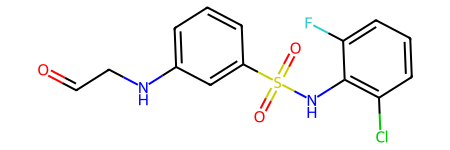

In [161]:
mol_error[2][0]

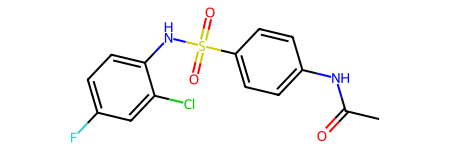

In [162]:
mol_error[2][1]

In [160]:
eroor_supposed

[2,
 9,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 38,
 39,
 40,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 53,
 54,
 55,
 57,
 59,
 60,
 62,
 64,
 65,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 97,
 98,
 99]

In [41]:
error = list(set(error))

In [42]:
for k in error:
    eroor_supposed.remove(k)

In [44]:
error

[3,
 5,
 6,
 7,
 12,
 15,
 16,
 17,
 22,
 27,
 28,
 30,
 31,
 33,
 36,
 38,
 40,
 42,
 52,
 59,
 62,
 69,
 74,
 76,
 93]

In [43]:
eroor_supposed

[2,
 9,
 14,
 18,
 23,
 29,
 37,
 39,
 41,
 44,
 45,
 47,
 48,
 50,
 51,
 53,
 54,
 55,
 57,
 58,
 60,
 64,
 65,
 67,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 94,
 95,
 96,
 97,
 98,
 99]

In [33]:
max_retro_bond_ratio["inchkey_encoding"][max_retro_bond_ratio.index[2]].split('_')

['QUGUFLJIAFISSW-UHFFFAOYSA-N',
 'QGZKDVFQNNGYKY-UHFFFAOYSA-N',
 'RAHZWNYVWXNFOC-UHFFFAOYSA-N',
 'UHOVQNZJYSORNB-UHFFFAOYSA-N',
 'LELOWRISYMNNSU-UHFFFAOYSA-N']

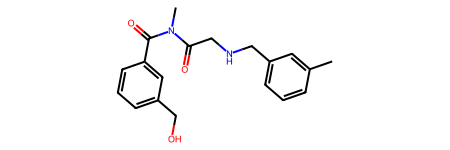

In [53]:
mol_error[11][0]

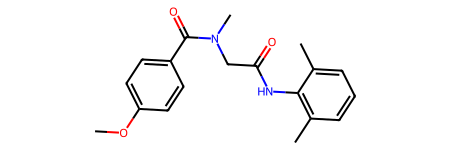

In [54]:
mol_error[11][1]

In [91]:
eroor_supposed 

[2,
 3,
 5,
 6,
 7,
 9,
 12,
 14,
 15,
 16,
 17,
 18,
 22,
 23,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 62,
 64,
 65,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [93]:
error = list(set(error))

In [95]:
error

[3,
 5,
 6,
 7,
 12,
 15,
 16,
 17,
 22,
 27,
 28,
 30,
 31,
 33,
 36,
 38,
 40,
 42,
 52,
 59,
 62,
 69,
 74,
 76,
 93]

In [94]:
eroor_supposed == error

False

In [ ]:
reformed_smiles = []
for m in tqdm(lensss):

In [ ]:
block_dico

In [30]:
block_dico2

{0: [{'C1-C(-F)=C-C=C(-C=1)-F',
   'C1-C=C(-F)-C(=C-C=1-F)',
   'C1=C-C(-F)=C-C=C-1-F',
   'F-C1=C-C=C(-F)-C(=C-1)',
   'F-C1=C-C=C(-F)-C=C-1'},
  {'N'},
  {'S(=O)(=O)'},
  {'C1-C(-F)=C(-F)-C(-F)=C(-C=1)',
   'C1-C(-F)=C(-F)-C(=C-C=1)-F',
   'C1-C=C(-F)-C(-F)=C(-C=1)-F',
   'C1=C-C(-F)=C(-F)-C(=C-1)-F',
   'C1=C-C=C(-F)-C(-F)=C-1-F',
   'C1=C-C=C(-F)-C(=C-1-F)-F',
   'F-C1-C(-F)=C(-F)-C(=C-C=1)',
   'F-C1-C(-F)=C(-F)-C=C(-C=1)',
   'F-C1-C(-F)=C-C(=C-C=1-F)',
   'F-C1-C(-F)=C-C=C(-C=1-F)',
   'F-C1=C(-F)-C(-F)=C-C(=C-1)',
   'F-C1=C(-F)-C(-F)=C-C=C-1',
   'F-C1=C(-F)-C=C(-C=C-1-F)'}],
 1: [{'C1-C(-F)=C-C=C(-C=1)-F',
   'C1-C=C(-F)-C(=C-C=1-F)',
   'C1=C-C(-F)=C-C=C-1-F',
   'F-C1=C-C=C(-F)-C(=C-1)',
   'F-C1=C-C=C(-F)-C=C-1'},
  {'N'},
  {'S(=O)(=O)'},
  {'C1-C=C-C(=C-C=1)',
   'C1-C=C-C=C(-C=1)',
   'C1-C=C-C=C-C=1',
   'C1=C-C=C(-C=C-1)',
   'C1=C-C=C-C(=C-1)',
   'C1=C-C=C-C=C-1'},
  {'C#N', 'N#C'}],
 2: [{'C1-C(-F)=C-C=C(-C=1)-F',
   'C1-C=C(-F)-C(=C-C=1-F)',
   'C1=C-C(-F)=C-C=C-1

In [2]:
import pandas as pd 
df = pd.read_csv("../data/training_data/moses_selfies.csv")
df["split"] = df["SPLIT"]
df["smiles"] = df["SELFIES"]
df["scaffold_smiles"] = df["SELFIES"]

In [4]:
df = df.drop(columns=["SELFIES","SPLIT"])

In [6]:
df.to_csv("../seflies_moses.csv")

In [13]:
from tqdm import tqdm 

In [3]:
import pandas as pd

blocks = pd.read_parquet("../data/raw/moses_block_smiles/blocks/part-0.parquet")
smile_blocked  = pd.read_parquet("../data/raw/moses_block_smiles/smiles_blocked/part-0.parquet")

In [26]:
blocks = blocks.drop_duplicates(subset=["block"])

In [27]:
blocks

,block,begin_tag,end_tag,MolWt,nHDonors,nHAcceptors,nRotatableBonds,CrippenlogP,TPSA,status
0,F-C1-C(=C-C=C(-C=1-F)-S(=O)(=O)-N-C1=C-C(-F)=C...,no_tag,no_tag,323.003941,1,2,3,3.18290,46.17,False
1,F-C1=C-C=C(-F)-C=C-1,no_tag,L16,114.028107,0,0,0,1.96480,0.00,True
2,N,L5,L5,17.026549,1,1,0,0.16200,35.00,True
3,S(=O)(=O),L12b_L12,L12b,63.961900,0,2,0,-0.67020,34.14,True
4,C1-C(-F)=C(-F)-C(=C-C=1)-F,L16,no_tag,132.018685,0,0,0,2.10390,0.00,True
...,...,...,...,...,...,...,...,...,...,...
786511,C1-C(=C-C=C(-C=1)-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True
786512,C1=C-C(=C-C=C-1-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True
786514,C1-C=C(-C(=C-C=1)-N1-N=C-C(=C-1)-Cl),L16,L16,178.029776,0,2,1,2.52570,17.82,True
786745,C(-C-C(=O)-N-C1=C-C=C(-C)-C=N-1),L8,L4,164.094963,1,2,2,1.73852,41.99,True


In [28]:
len(list(set(blocks["block"].to_list())))

169505

In [167]:
smile_blocked

,smiles,smiles_blocked,nb_pure_block,nb_retro_bond,nb_smiles_bond,retro_bond_ratio,pure,zinc_id,mem_score
0,C-C1=N-O-C(-C)=C-1-C-C(=O)-N-C1-C=C-C(=C-C=1)-...,C-C1=N-O-C(-C)=C-1_C-C(=O)_N_C1-C=C-C(=C-C=1)_...,7,6,9,1.0,True,15252,0.848485
1,C-O-C-C1=N-N-C(=N-1)-C1=C-C=C(-C=C-1)-N-C(=O)-...,C-O_C_C1=N-N-C(=N-1)_C1=C-C=C(-C=C-1)_N_C(=O)-...,7,6,9,1.0,True,15252,0.848485
2,C1-C=C-C=C2-C=1-C=C-N-2-C-C(=O)-N-C-C1=N-N=C2-...,C1-C=C-C=C2-C=1-C=C-N-2_C-C(=O)_N_C_C1=N-N=C2-...,4,4,5,1.0,False,15253,0.898305
3,C1-C=C-N=C2-C=1-N-C(=N-2)-C-C-C(=O)-N-C1=C-C=C...,C1-C=C-N=C2-C=1-N-C(=N-2)_C-C-C(=O)_N_C1=C-C=C...,4,3,6,1.0,True,15254,0.964286
4,N1=C-C=C-C=C-1-N-C(=O)-C-N1-C=C-C2-N3-N=C-C=C-...,N1=C-C=C-C=C-1_N_C(=O)-C_N1-C=C-C2-N3-N=C-C=C-...,3,3,5,1.0,False,15255,1.278689
...,...,...,...,...,...,...,...,...,...
3639990,C-C-C1-S-C=C(-N=1)-C-S-C1-N(-N)-C(=O)-C(=N-N=1)-C,C-C_C1-S-C=C(-N=1)_C_S_C1-N(-N)-C(=O)-C(=N-N=1)-C,4,4,6,1.0,False,1525192,1.020408
3639991,N-N1-C(=O)-C(-C)=N-N=C-1-S-C-C1=C-S-C(=N-1)-C-C,N-N1-C(=O)-C(-C)=N-N=C-1_S_C_C1=C-S-C(=N-1)_C-C,4,4,6,1.0,False,1525192,0.893617
3639992,C-C-C1-S-C=C(-N=1)-C-S-C1=N-N=C(-C)-C(-N-1-N)=O,C-C_C1-S-C=C(-N=1)_C_S_C1=N-N=C(-C)-C(-N-1-N)=O,4,4,6,1.0,False,1525192,0.914894
3639993,C-C1(-C)-C2-O-C-C-C-2-C-1-N-C(=O)-C1-C=C(-Cl)-...,C-C1(-C)-C2-O-C-C-C-2-C-1_N_C(=O)_C1-C=C(-Cl)-...,6,5,7,1.0,True,1525193,1.066667


In [5]:

max_retro_ratio_df=smile_blocked.iloc[smile_blocked.groupby('zinc_id')['retro_bond_ratio'].idxmax()]



In [6]:
max_retro_ratio_df

,smiles,smiles_blocked,nb_pure_block,nb_retro_bond,nb_smiles_bond,retro_bond_ratio,pure,zinc_id,mem_score
28858,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,F-C1=C-C=C(-F)-C=C-1_N_S(=O)(=O)_C1-C(-F)=C(-F...,4,3,5,1.0,True,0,1.000000
28878,F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...,F-C1=C-C=C(-F)-C(=C-1)_N_S(=O)(=O)_C1-C=C-C=C(...,5,4,6,1.0,True,1,0.890909
28880,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C=C(-C=C...,F-C1=C-C=C(-F)-C=C-1_N_S(=O)(=O)_C1=C-C=C(-C=C...,5,4,6,1.0,True,2,0.849057
28882,O1-C-C-C-O-C2-C-1=C-C=C(-C=2)-S(=O)(=O)-N-C1-C...,O1-C-C-C-O-C2-C-1=C-C=C(-C=2)_S(=O)(=O)_N_C1-C...,4,3,4,1.0,True,3,1.031250
28884,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C(=C-C=C...,F-C1=C-C=C(-F)-C=C-1_N_S(=O)(=O)_C1=C-C(=C-C=C...,5,5,6,0.8,True,4,0.894737
...,...,...,...,...,...,...,...,...,...
922166,F-C(-F)(-F)-C1-C=C-C=C(-C=1)-C(-C1-C=N-C=C-C=1...,F-C(-F)(-F)_C1-C=C-C=C(-C=1)_C(-C1-C=N-C=C-C=1...,4,5,6,0.8,False,1936951,0.950820
922170,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N1-C-C-C...,C1-C-C-C-N2-C-1-C-O-C(-C-2)_C_N_C(=O)_N1-C-C-C...,5,4,4,1.0,True,1936952,0.920000
922171,C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N-C1=C-C...,C1-C-C-C-N2-C-1-C-O-C(-C-2)_C_N_C(=O)_N_C1=C-C...,6,5,5,1.0,True,1936953,0.888889
922172,O=C(-C(-C)(-C)-C)-N1-C-C-C-N(-C-C-1)-C1=N-C=N-...,O=C(-C(-C)(-C)-C)_N1-C-C-C-N(-C-C-1)_C1=N-C=N-...,2,2,4,1.0,False,1936954,1.121212


In [7]:
moses_can_smiles = pd.read_csv("../data/training_data/moses_canonical.csv")

In [9]:
max_retro_ratio_df["split"] = moses_can_smiles["SPLIT"]

/tmp/ipykernel_1259405/1472382343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_retro_ratio_df["split"] = moses_can_smiles["SPLIT"]


In [33]:
new_data_set_multiblock = pd.DataFrame()
block = []
smiles = []
split = []
for k in tqdm(max_retro_ratio_df.index):
    smiles_blocked_split = max_retro_ratio_df["smiles_blocked"][k].split("_")
    max_weight = 0
    heavier_smiles = ""
    for l in smiles_blocked_split:
        if max_weight< blocks[blocks["block"]==l]["MolWt"].values[0]:
            max_weight =blocks[blocks["block"]==l]["MolWt"].values[0]
            heavier_smiles = l
    block.append(heavier_smiles)
    smiles.append(max_retro_ratio_df["smiles"][k])
    split.append(max_retro_ratio_df["split"][k])
    

  0%|          | 276/1936926 [00:13<26:29:53, 20.30it/s]


KeyboardInterrupt: 

In [16]:
new_data_set_multiblock["smiles"] = smiles
new_data_set_multiblock["split"] = split
new_data_set_multiblock["block"] = block

In [17]:
new_data_set_multiblock

,smiles,split,block
0,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,train,F-C1=C-C=C(-F)-C=C-1
1,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,train,N
2,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,train,S(=O)(=O)
3,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,train,C1-C(-F)=C(-F)-C(=C-C=1)-F
4,F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...,train,F-C1=C-C=C(-F)-C(=C-1)
...,...,...,...
10620132,C1-C=C-C=C2-C=1-N=C(-S-2)-N-C(=O)-N-C-C1-O-C-C...,train,N
10620133,C1-C=C-C=C2-C=1-N=C(-S-2)-N-C(=O)-N-C-C1-O-C-C...,train,C(=O)
10620134,C1-C=C-C=C2-C=1-N=C(-S-2)-N-C(=O)-N-C-C1-O-C-C...,train,N
10620135,C1-C=C-C=C2-C=1-N=C(-S-2)-N-C(=O)-N-C-C1-O-C-C...,train,C


In [ ]:
new_data_set_multiblock.to_csv("../data/training_data/blocksmiles_maxweight.csv")

In [35]:
import pandas as pd
from multiprocessing import Pool, cpu_count
from joblib import Parallel, delayed
from tqdm import tqdm
import numpy as np

def process_row(args):
    """Fonction pour traiter une ligne individuellement"""
    k, smiles_blocked, smiles_val, split_val, blocks_dict = args
    
    smiles_blocked_split = smiles_blocked.split("_")
    max_weight = 0
    heavier_smiles = ""
    
    for l in smiles_blocked_split:
        if l in blocks_dict:
            weight = blocks_dict[l]
            if max_weight < weight:
                max_weight = weight
                heavier_smiles = l
    
    return {
        'block': heavier_smiles,
        'smiles': smiles_val,
        'split': split_val
    }

def parallel_process_dataframe(max_retro_ratio_df, blocks, n_cores=None):
    """Traitement parallèle du DataFrame"""
    
    # Créer un dictionnaire pour accès rapide aux poids
    blocks_dict = dict(zip(blocks["block"], blocks["MolWt"]))
    
    # Préparer les arguments pour chaque processus
    args_list = []
    for k in max_retro_ratio_df.index:
        args_list.append((
            k,
            max_retro_ratio_df["smiles_blocked"][k],
            max_retro_ratio_df["smiles"][k],
            max_retro_ratio_df["split"][k],
            blocks_dict
        ))
    
    # Déterminer le nombre de cœurs
    if n_cores is None:
        n_cores = min(cpu_count(), len(args_list))
    
    print(f"Traitement avec {n_cores} cœurs sur {len(args_list)} lignes")
    
    # Traitement parallèle
    with Pool(n_cores) as pool:
        results = list(tqdm(
            pool.imap(process_row, args_list),
            total=len(args_list),
            desc="Processing rows"
        ))
    
    # Convertir en DataFrame
    new_data_set_multiblock = pd.DataFrame(results)
    
    return new_data_set_multiblock

# Solution 2: Avec joblib (plus simple)
def process_row_joblib(k, max_retro_ratio_df, blocks_dict):
    """Fonction pour traiter une ligne avec joblib"""
    smiles_blocked_split = max_retro_ratio_df["smiles_blocked"][k].split("_")
    max_weight = 0
    heavier_smiles = ""
    
    for l in smiles_blocked_split:
        if l in blocks_dict:
            weight = blocks_dict[l]
            if max_weight < weight:
                max_weight = weight
                heavier_smiles = l
    
    return {
        'block': heavier_smiles,
        'smiles': max_retro_ratio_df["smiles"][k],
        'split': max_retro_ratio_df["split"][k]
    }

def parallel_process_joblib(max_retro_ratio_df, blocks, n_cores=4):
    """Traitement parallèle avec joblib"""
    
    # Créer un dictionnaire pour accès rapide
    blocks_dict = dict(zip(blocks["block"], blocks["MolWt"]))
    
    # Traitement parallèle
    results = Parallel(n_jobs=n_cores)(
        delayed(process_row_joblib)(k, max_retro_ratio_df, blocks_dict)
        for k in tqdm(max_retro_ratio_df.index, desc="Processing")
    )
    
# Solution 3: Vectorisation avec pandas (le plus rapide)
def vectorized_process(max_retro_ratio_df, blocks):
    """Approche vectorisée sans parallélisation explicite"""
    
    # Créer un dictionnaire pour mapping rapide
    blocks_dict = dict(zip(blocks["block"], blocks["MolWt"]))
    
    def find_heaviest_block(smiles_blocked):
        splits = smiles_blocked.split("_")
        max_weight = 0
        heavier_smiles = ""
        
        for block in splits:
            if block in blocks_dict:
                weight = blocks_dict[block]
                if weight > max_weight:
                    max_weight = weight
                    heavier_smiles = block
        
        return heavier_smiles
    
    # Application vectorisée
    tqdm.pandas(desc="Processing rows")
    new_data_set_multiblock = pd.DataFrame({
        'block': max_retro_ratio_df['smiles_blocked'].progress_apply(find_heaviest_block),
        'smiles': max_retro_ratio_df['smiles'],
        'split': max_retro_ratio_df['split']
    })
    
    return new_data_set_multiblock

# Utilisation
if __name__ == "__main__":
    # Solution 1: Multiprocessing
    print("=== Solution 1: Multiprocessing ===")
    new_data_set_multiblock = parallel_process_dataframe(
        max_retro_ratio_df, 
        blocks, 
        n_cores=4
    )
    
    """# Solution 2: Joblib  
    print("\n=== Solution 2: Joblib ===")
    new_data_set_multiblock = parallel_process_joblib(
        max_retro_ratio_df, 
        blocks, 
        n_cores=4
    )
    
    # Solution 3: Vectorisation
    print("\n=== Solution 3: Vectorisation ===")
    new_data_set_multiblock = vectorized_process(
        max_retro_ratio_df, 
        blocks
    )"""
    
    print(f"Résultats: {len(new_data_set_multiblock)} lignes traitées")
    print(new_data_set_multiblock.head())

=== Solution 1: Multiprocessing ===
Traitement avec 4 cœurs sur 1936926 lignes


Processing rows: 100%|██████████| 1936926/1936926 [16:04:31<00:00, 33.47it/s]  


Résultats: 1936926 lignes traitées
                           block  \
0     C1-C(-F)=C(-F)-C(=C-C=1)-F   
1         F-C1=C-C=C(-F)-C(=C-1)   
2           F-C1=C-C=C(-F)-C=C-1   
3  O1-C-C-C-O-C2-C-1=C-C=C(-C=2)   
4           F-C1=C-C=C(-F)-C=C-1   

                                              smiles  split  
0  F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...  train  
1  F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...  train  
2  F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C=C(-C=C...  train  
3  O1-C-C-C-O-C2-C-1=C-C=C(-C=2)-S(=O)(=O)-N-C1-C...  train  
4  F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C(=C-C=C...  train  


In [38]:
new_data_set_multiblock.to_csv("../data/training_data/blocksmiles_maxweight.csv",index=False)

In [5]:
def convert(sr):
    true_sr = ""
    for k in sr.split("-"):
        true_sr += k
    return true_sr

In [7]:
max_retro_ratio_df["true_smiles"] = max_retro_ratio_df["smiles"].apply(convert)

/tmp/ipykernel_1227564/42843889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_retro_ratio_df["true_smiles"] = max_retro_ratio_df["smiles"].apply(convert)


In [ ]:
max_retro_ratio_df["true_smiles"].to_list() == moses_can_smiles["SMILES"].to_list()

False

In [16]:
from rdkit import Chem
from tqdm import tqdm

In [18]:
mol_reformed  = [Chem.MolFromSmiles(k) for k in tqdm(max_retro_ratio_df["true_smiles"].to_list()[:100])]

100%|██████████| 100/100 [00:00<00:00, 6562.73it/s]


In [ ]:
original_mol =[Chem.MolFromSmiles(k) for k in tqdm(moses_can_smiles["SMILES"])] 

In [ ]:
for i in mol_reformed:
    print(i in original_mol)
    break

False


In [39]:
pd.read_csv("../data/training_data/blocksmiles_maxweight.csv")

/tmp/ipykernel_1259405/1758790969.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("../data/training_data/blocksmiles_maxweight.csv")


,block,smiles,split
0,C1-C(-F)=C(-F)-C(=C-C=1)-F,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1-C(-F)=C(-F...,train
1,F-C1=C-C=C(-F)-C(=C-1),F-C1=C-C=C(-F)-C(=C-1)-N-S(=O)(=O)-C1-C=C-C=C(...,train
2,F-C1=C-C=C(-F)-C=C-1,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C=C(-C=C...,train
3,O1-C-C-C-O-C2-C-1=C-C=C(-C=2),O1-C-C-C-O-C2-C-1=C-C=C(-C=2)-S(=O)(=O)-N-C1-C...,train
4,F-C1=C-C=C(-F)-C=C-1,F-C1=C-C=C(-F)-C=C-1-N-S(=O)(=O)-C1=C-C(=C-C=C...,train
...,...,...,...
1936921,C(-C1-C=N-C=C-C=1),F-C(-F)(-F)-C1-C=C-C=C(-C=1)-C(-C1-C=N-C=C-C=1...,train
1936922,C1-C-C-C-N2-C-1-C-O-C(-C-2),C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N1-C-C-C...,train
1936923,C1-C-C-C-N2-C-1-C-O-C(-C-2),C1-C-C-C-N2-C-1-C-O-C(-C-2)-C-N-C(=O)-N-C1=C-C...,train
1936924,C1=N-C=N-C2-C-1=C-C=C(-N=2)-N,O=C(-C(-C)(-C)-C)-N1-C-C-C-N(-C-C-1)-C1=N-C=N-...,test_scaffolds


In [41]:
def replacing(smile):
    return smile.replace("-","")

In [42]:
new_data_set_multiblock["smiles"] = new_data_set_multiblock["smiles"].apply(replacing)

In [44]:
new_data_set_multiblock["block"] = new_data_set_multiblock["block"].apply(replacing)

In [55]:
new_data_set_multiblock.to_csv("../data/training_data/blocksmiles_maxweight.csv", index=False)

In [47]:
from rdkit import Chem

,block,split,SMILES
0,C1C(F)=C(F)C(=CC=1)F,train,FC1=CC=C(F)C=C1NS(=O)(=O)C1C(F)=C(F)C(=CC=1)F
1,FC1=CC=C(F)C(=C1),train,FC1=CC=C(F)C(=C1)NS(=O)(=O)C1C=CC=C(C=1)C#N
2,FC1=CC=C(F)C=C1,train,FC1=CC=C(F)C=C1NS(=O)(=O)C1=CC=C(C=C1)C#N
3,O1CCCOC2C1=CC=C(C=2),train,O1CCCOC2C1=CC=C(C=2)S(=O)(=O)NC1C(F)=CC=C(C=1)F
4,FC1=CC=C(F)C=C1,train,FC1=CC=C(F)C=C1NS(=O)(=O)C1=CC(=CC=C1OC)OC
...,...,...,...
1936921,C(C1C=NC=CC=1),train,FC(F)(F)C1C=CC=C(C=1)C(C1C=NC=CC=1)NS(N)(=O)=O
1936922,C1CCCN2C1COC(C2),train,C1CCCN2C1COC(C2)CNC(=O)N1CCCC1
1936923,C1CCCN2C1COC(C2),train,C1CCCN2C1COC(C2)CNC(=O)NC1=CC=CC=N1
1936924,C1=NC=NC2C1=CC=C(N=2)N,test_scaffolds,O=C(C(C)(C)C)N1CCCN(CC1)C1=NC=NC2C1=CC=C(N=2)N


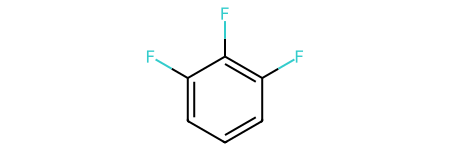

In [48]:
Chem.MolFromSmiles("C1C(F)=C(F)C(=CC=1)F")

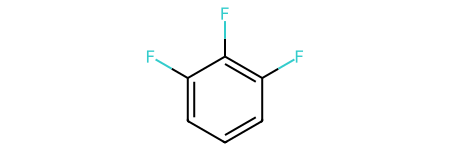

In [49]:
Chem.MolFromSmiles("C1-C(-F)=C(-F)-C(=C-C=1)-F")